In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import _pickle as cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

In [4]:
def get_fit(h1, delta):
    return cPickle.load(open('results/bi_poo_fit_h1_{0}_delta_{1}.p'.format(h1, delta), 'rb'))


delta_s_fit = [str(a) for a in np.linspace(-100.0, 100.0, 101)]

params_fit = list(product(h1_s, delta_s_fit))
# (False, -100~100)
# (True,  -100~100)

data_fit = {tup:get_fit(*tup) for tup in params_fit}

In [6]:
bi_poo = np.loadtxt('./data/bi_poo_stdp_points.csv', delimiter=',')
print(len(bi_poo))

45


In [7]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

def plot_bi_poo():
    plt.scatter(-bi_poo[:,0],
                bi_poo[:,1],
                lw=0,
                c='#984ea3',
                s=40,
                zorder=-100)
    plt.plot([-100,100], [0,0],     'k--') # x axis
    plt.plot([0,0],      [-60,120], 'k--') # y axis
    plt.xlim([-100, 100])
    plt.ylim([-60,  120])

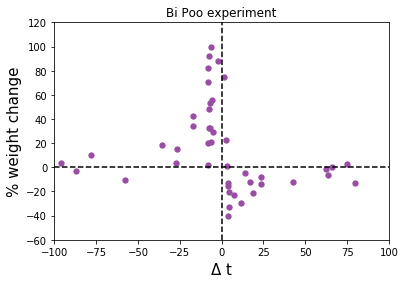

In [11]:
plot_bi_poo()
plt.title('Bi Poo experiment')
plt.xlabel('$\Delta$ t', fontsize=15)
plt.ylabel('% weight change', fontsize=15)
plt.show()

In [22]:
def plot_fit(h1):
    # h1 = True or False
    dws = np.zeros(len(delta_s_fit))
    for idx, delta in enumerate(delta_s_fit):
        p = (str(h1), delta)
        data = data_fit[p][0][0]
        dws[idx] = data.res['weights'][-1] / data.res['weights'][0]
    plt.plot([float(a) for a in delta_s_fit], 100 * dws-100)

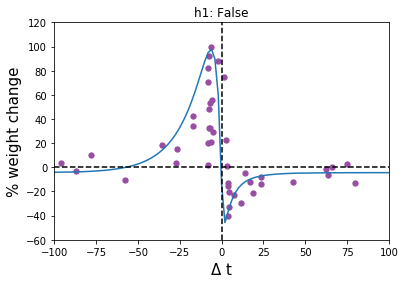

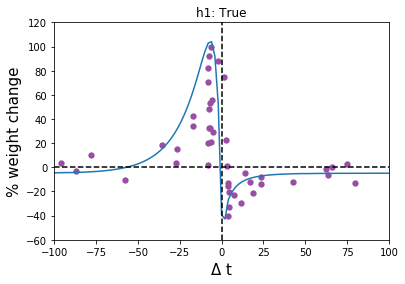

In [23]:
for h1 in h1_s:
    plt.figure()
    plot_fit(h1)
    plot_bi_poo()
    plt.xlabel('$\Delta$ t', fontsize=15)
    plt.ylabel('% weight change', fontsize=15)
    plt.title('h1: {0}'.format(h1))